In [ ]:
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def load_data():
  train_data = pd.read_csv('/content/Data-Train.csv')
  test_data = pd.read_csv('/content/Data-Test.csv',)
  print(len(train_data), " Train Data Loaded")
  print(len(test_data), " Test Data Loaded")
  return train_data, test_data

def normalization(data):
  data[:,0] = (data[:,0]) / data[:,0].max()
  return data
  
def prepare_data():
  train , test = load_data()
  train = train.to_numpy(dtype='float64')
  test = test.to_numpy(dtype='float64')
  train = normalization(train)
  test = normalization(test)
  x = train[: , 0:-1]
  y = train[: , -1]
  x_ = test[: , 0:-1]
  y_ = test[: , -1]
  return x,y,x_,y_

def init_weights(size):
  return np.random.rand(size)

def batching_data(x, y, batch_size=1):
  batches = []
  size= x.shape[0]
  indexes = list(range(size))
  np.random.shuffle(indexes)
  for i in range(0, size, batch_size):
    j = i + batch_size
    j = j if j < size else size
    batch = indexes[i:j]
    batches.append((x.take(batch, axis=0), y.take(batch)))
  return batches

def compute_loss(x, y, y_, theta):
  error = y_ - y
  loss = (np.dot(x.T, error))/(len(x))
  return loss

def predict(x, theta):
  return np.dot(x, theta)

def mse(y_, y):
  diff = np.subtract(y_, y)
  ms = np.power(diff, 2, dtype='float64')
  return np.mean(ms)

def train(x_test, y_test, weights):
  for i in range(epochs):
    for batch in batches:
      x, y = batch
      y_ = predict(x, weights)
      loss= compute_loss(x, y, y_, weights)
      weights = weights - lr * loss
    loss_log.append(loss)
    y_ = predict(x_test, weights)
    _mse = mse(y_, y_test)
    mse_log.append(_mse)
    theta_log.append(weights)
    if i % 100 == 0:
        print(f'Epoch: {i} | MSE Test: {_mse}')
  return weights

def lin_regplot(X, y, model):
    plt.scatter(X, y, c='blue')
    plt.plot(X, predict(X, model), color='red',)    
    return

mse_log = []
theta_log = []
loss_log= []
epochs = 401
lr = 0.01
batch_size = 1

1000  Train Data Loaded
300  Test Data Loaded
Epoch: 0 | MSE Test: 14.783683654185381
Epoch: 100 | MSE Test: 9.338646770314494
Epoch: 200 | MSE Test: 9.338646770314494
Epoch: 300 | MSE Test: 9.338646770314494
Epoch: 400 | MSE Test: 9.338646770314494
MSE Train  8.33998456267231


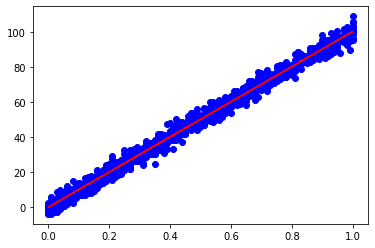

In [ ]:
x_train, y_train, x_test, y_test = prepare_data()
weights = init_weights(x_train.shape[1])
batches = batching_data(x_train, y_train, batch_size)
gdmodel = train(x_test, y_test, weights)
print("MSE Train ", mse(predict(x_train, gdmodel), y_train))
lin_regplot(x_train, y_train, gdmodel)


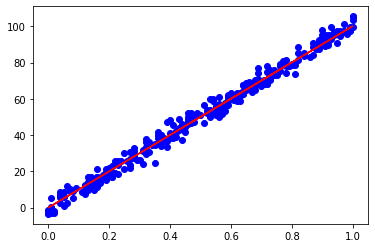

In [ ]:
lin_regplot(x_test, y_test, gdmodel)

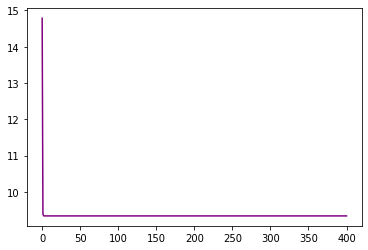

In [ ]:
def plot_cost(X, y):
    plt.plot(X, y, color='purple')    
    return
plot_cost(list(range(len(mse_log))), mse_log)


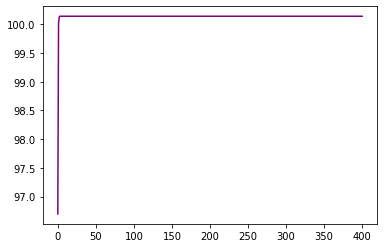

In [ ]:
plot_cost(list(range(len(theta_log))),theta_log)

In [ ]:
loss_log = np.array(loss_log, dtype='float64')
loss_log = loss_log * -1

Minimum Cost =  -2.5508615249956588


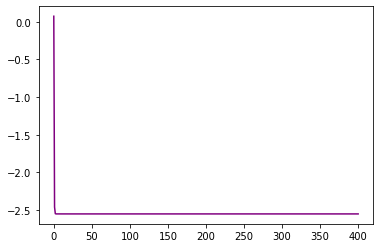

In [ ]:
print("Minimum Cost = ", loss_log.min())
plot_cost(list(range(len(loss_log))), loss_log)

In [ ]:
cfmodel = np.array([100.15481913], dtype='float64')
def cfprediction(x, model):
  return np.dot(model.T, x.T).flatten()

def gdprediction(x,model):
  return np.dot(x, model)

y_1 = cfprediction(x_test, cfmodel)
y_2 = gdprediction(x_test, gdmodel)

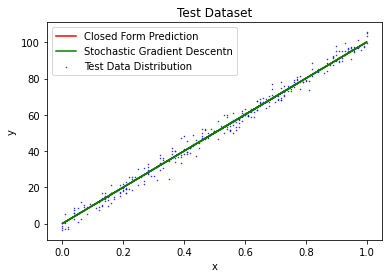

In [ ]:
def regressionLinePlot(X, y, y_preds1, y_preds2, lineColors, plotlabels, scatterLabel="scatter", title="title", xlabel="xlabel", ylabel="ylabel", scatterColor="blue"):
    plt.scatter(X, y, c=scatterColor, label=scatterLabel, s=0.2)
    plt.plot(X, y_preds1, color=lineColors[0], label=plotlabels[0])
    plt.plot(X, y_preds2, color=lineColors[1], label=plotlabels[1])
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    return
scatterLabel = "Test Data Distribution"
predictions = [cfmodel, gdmodel]
lineColors = ["red", "green"]
plotlabels = ["Closed Form Prediction",
              "Stochastic Gradient Descentn"]
regressionLinePlot(x_test, y_test, y_1, y_2, lineColors=lineColors, plotlabels=plotlabels, scatterLabel=scatterLabel,
                   title="Test Dataset", xlabel="x", ylabel="y")
plt.show()

In [ ]:
gdmodel

array([100.13993919])